In [3]:
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso, ElasticNet, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score 
import numpy as np 


In [5]:
glass = pd.read_csv(r"..\Cases\Glass Identification\Glass.csv")
le = LabelEncoder()
y = le.fit_transform(glass['Type'])
X = glass.drop('Type', axis=1)


In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold


lr = LogisticRegression(solver='saga', random_state=24)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=24)

params = {'penalty':['elasticnet', 'L1', 'L2', None],
          'C':np.linspace(0.001, 10, 5),
          'l1_ratio':np.linspace(0.001, 1, 4),
          'multi_class':['ovr', 'multinomial']
          }

gcv = GridSearchCV(lr, param_grid=params, cv=kfold,scoring='neg_log_loss')

In [7]:
gcv.fit(X,y)

c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\linear_model\_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=None)
  warnings.warn(
c:\Users\Administrator.DAI-PC2\.conda\envs\New\lib\site-packages\sklearn\linear_model\_logistic.py:1186: UserWarning: Setting penalty=None will ignore the C and l1_ratio 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=LogisticRegression(random_state=24, solver='saga'),
             param_grid={'C': array([1.00000e-03, 2.50075e+00, 5.00050e+00, 7.50025e+00, 1.00000e+01]),
                         'l1_ratio': array([0.001, 0.334, 0.667, 1.   ]),
                         'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['elasticnet', 'L1', 'L2', None]},
             scoring='neg_log_loss')

In [8]:
print(gcv.best_params_)
print(gcv.best_score_)


{'C': 0.001, 'l1_ratio': 0.001, 'multi_class': 'multinomial', 'penalty': None}
-1.098224924028305


<Axes: >

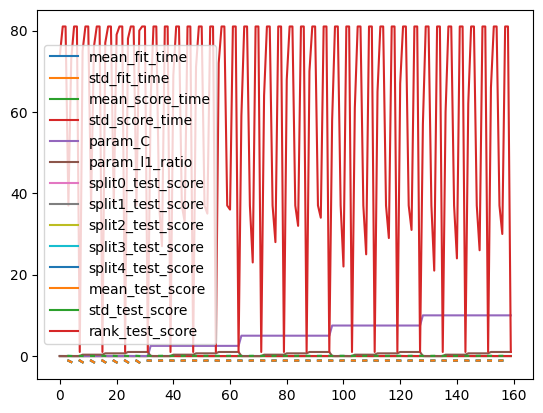

In [14]:
import matplotlib.pyplot as plt
pd_cv = pd.DataFrame(gcv.cv_results_)
pd_cv.plot()
# plt.plot(pd_cv.index, pd_cv['mean_test_score'])